## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("Indian_Kids_Screen_Time_Updated.csv")
df.head(10)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Impact_Category,Device_Category,Educational_Share,Recreational_Share
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical&Mental,Portable device,0.42,0.58
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teens,Mental,Portable device,0.30,0.70
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late teens,Mental,Wallmounted device,0.32,0.68
3,15,Female,1.21,Laptop,False,0.39,No health impact,Urban,Teenagers,No Impact,Portable device,0.39,0.61
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teens,Mental,Portable device,0.49,0.51
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Teenagers,Mental,Portable device,0.44,0.56
6,17,Male,2.97,TV,False,0.48,No health impact,Rural,Late teens,No Impact,Wallmounted device,0.48,0.52
7,10,Male,2.74,TV,True,0.54,No health impact,Urban,Pre-teens,No Impact,Wallmounted device,0.54,0.46
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Teenagers,Mental,Portable device,0.36,0.64
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,Late teens,Physical&Mental,Portable device,0.48,0.52


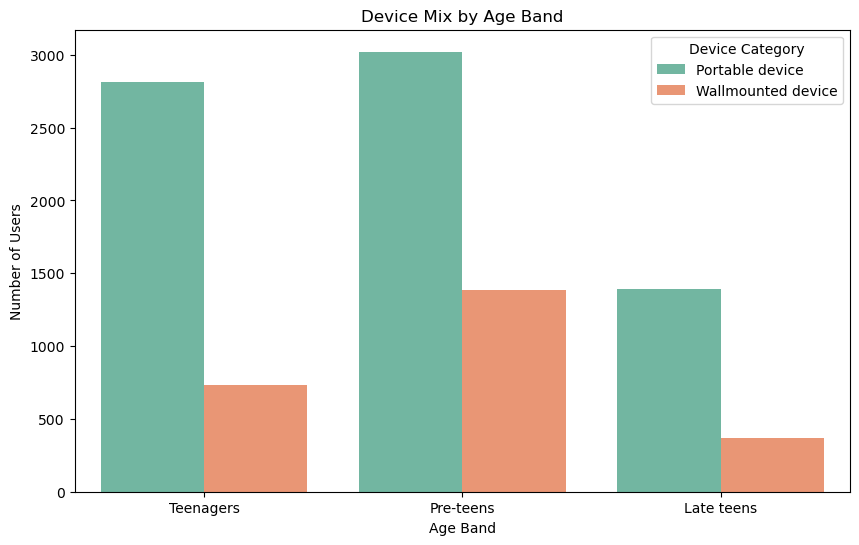

In [4]:
# Bar Chart – Device Mix by Age Band
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Band', hue='Device_Category', palette='Set2')
plt.title('Device Mix by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Users')
plt.legend(title='Device Category')
plt.show()

In [ ]:
# Insights:
1. Portable devices dominate across all age groups, but teens (13–16) use them most.
2. Wallmounted (e.g., TV) usage is higher for younger kids, suggesting family/shared use.

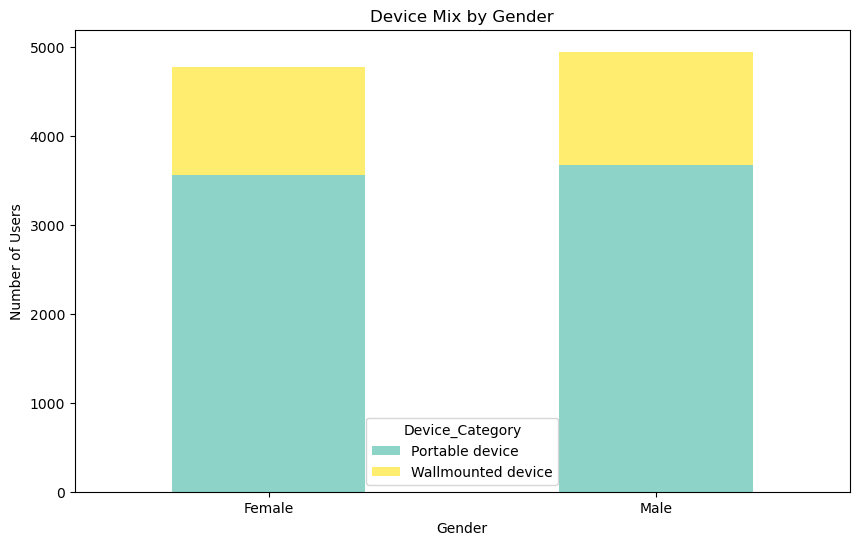

In [61]:
# Stacked Bar Chart – Device Mix by Gender
device_gender = df.groupby(['Gender','Device_Category']).size().unstack()
device_gender.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title('Device Mix by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Insights:
1. Both genders prefer portable devices, but female users show a slightly higher wallmounted share.

2. Total usage is balanced across genders.

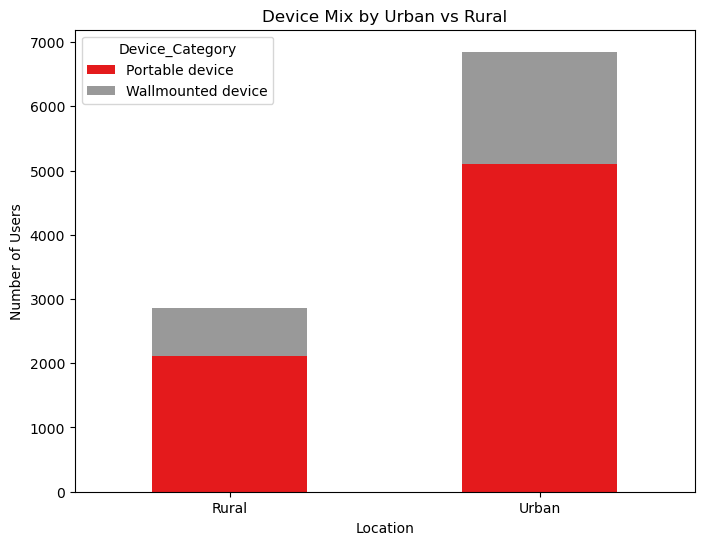

In [60]:
# Stacked Bar Chart – Device Mix by Urban/Rural
device_loc = df.groupby(['Urban_or_Rural','Device_Category']).size().unstack()
device_loc.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set1')
plt.title('Device Mix by Urban vs Rural')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Insights:
1. Urban kids use portable devices much more than rural kids.
2. Wallmounted devices have relatively higher usage in rural areas.

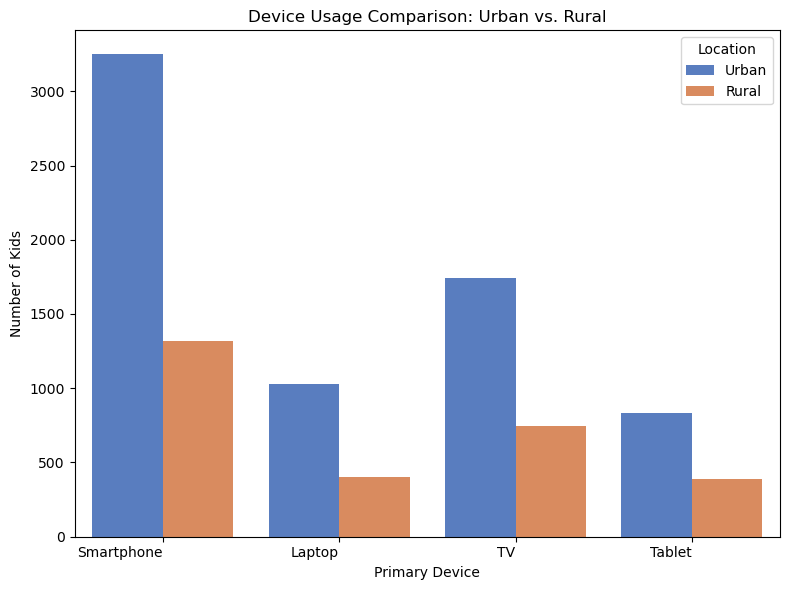

In [4]:
# Visual9: Device Usage by Location
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Primary_Device', hue='Urban_or_Rural', palette='muted')

# Add titles and labels for clarity
plt.title('Device Usage Comparison: Urban vs. Rural')
plt.xlabel('Primary Device')
plt.ylabel('Number of Kids')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Location')

plt.tight_layout()
plt.show()

In [ ]:
# Insight: 
1. Smartphone is used by most of the urban kids as well as Rural kids.

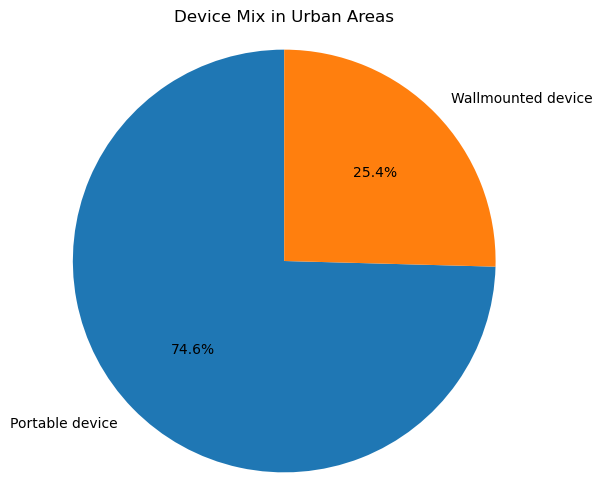

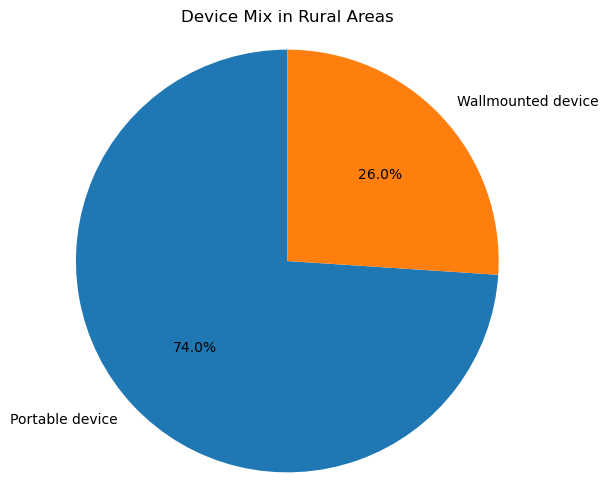

In [19]:
# Pie Chart – Device Mix for Urban vs Rural
for loc in df['Urban_or_Rural'].unique():
    plt.figure(figsize=(6,6))
    counts = df[df['Urban_or_Rural']==loc]['Device_Category'].value_counts()
    plt.pie(counts.values, labels=counts.index, autopct='%.1f%%', startangle=90)
    plt.title(f'Device Mix in {loc} Areas')
    plt.axis('equal')
    plt.show()

In [ ]:
# Insights:
1. Urban areas have higher portable device dominance.
2. Rural areas show a more balanced split, indicating shared TV usage.

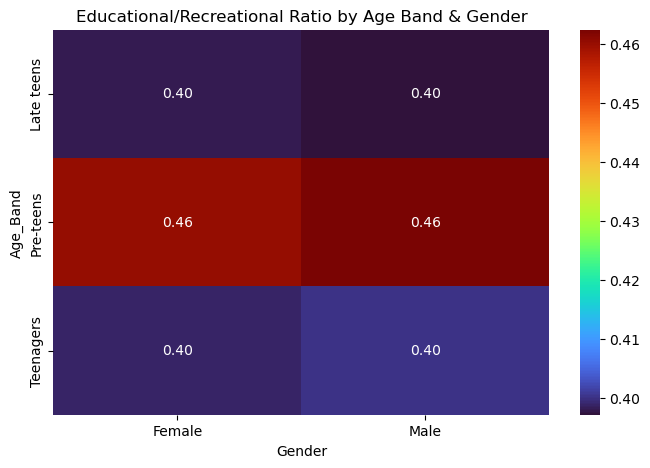

In [28]:
# Heatmap – Educational vs Recreational Ratio by Age Band & Gender
pivot_activity = df.pivot_table(
    values='Educational_to_Recreational_Ratio',
    index='Age_Band',
    columns='Gender',
    aggfunc='mean'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_activity, annot=True, cmap='turbo', fmt=".2f")
plt.title('Educational/Recreational Ratio by Age Band & Gender')
plt.show()

In [ ]:
# Insights:
1. Younger kids have higher educational ratios.
2. Teenagers boys show lowest educational ratios — high recreational usage.

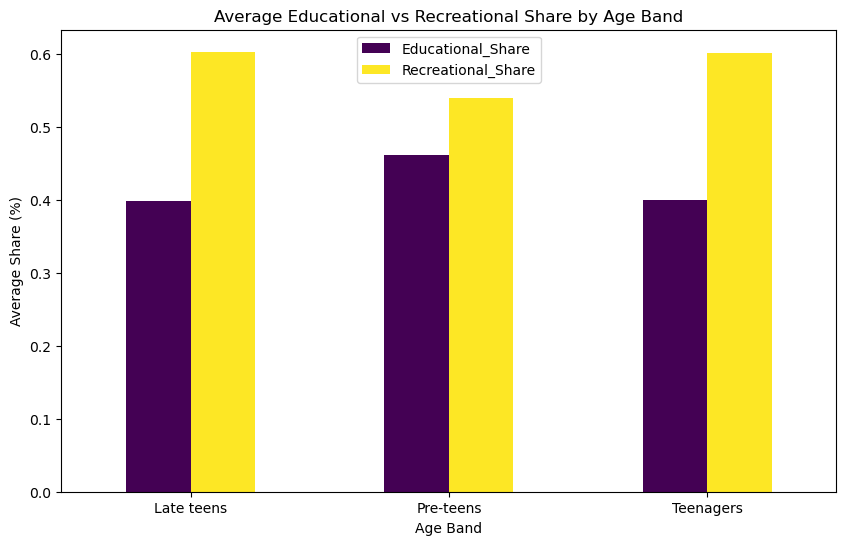

In [38]:
# Grouped Bar Chart – Average Screen Time by Activity & Age Band
avg_activity_age = df.groupby('Age_Band')[['Educational_Share','Recreational_Share']].mean()

avg_activity_age.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Average Educational vs Recreational Share by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Average Share (%)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Insights:
1. Recreational share increases steadily with age.
2. Teens spend significantly less proportion of time on educational activities.

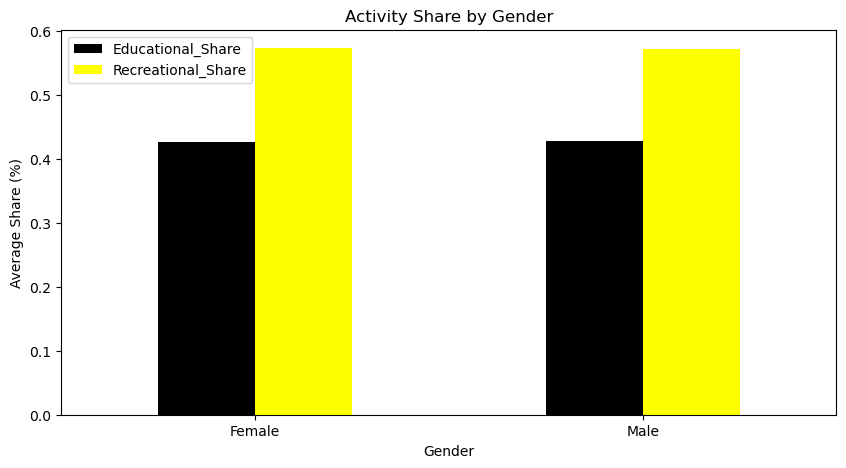

In [7]:
# Grouped Bar Chart – Activity Share by Gender
avg_activity_gender = df.groupby('Gender')[['Educational_Share','Recreational_Share']].mean()

avg_activity_gender.plot(kind='bar', figsize=(10,5), colormap='gnuplot')
plt.title('Activity Share by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Share (%)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Insights:
1. Educational and recreational shares are similar across genders, with slight variations.
2. Males have marginally higher recreational share.

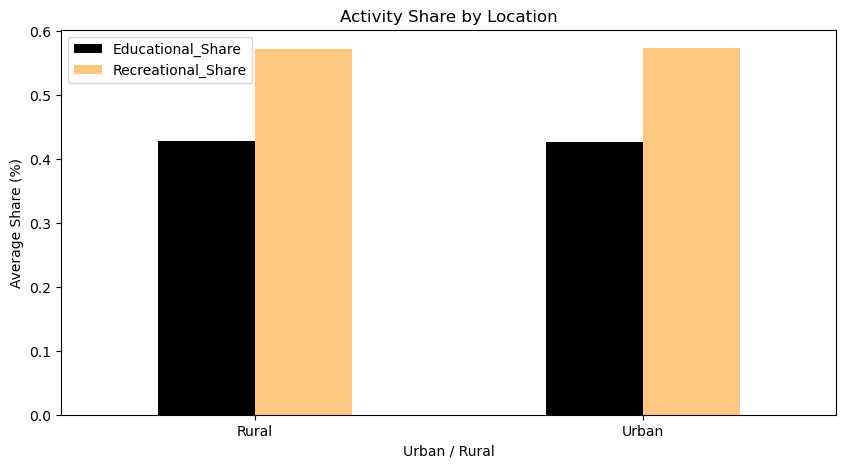

In [54]:
# Grouped Bar Chart – Activity Share by Urban vs Rural
avg_activity_loc = df.groupby('Urban_or_Rural')[['Educational_Share','Recreational_Share']].mean()

avg_activity_loc.plot(kind='bar', figsize=(10,5), colormap='copper')
plt.title('Activity Share by Location')
plt.xlabel('Urban / Rural')
plt.ylabel('Average Share (%)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Insights:
1. Urban kids show higher recreational share, reflecting more device access.
2. Rural kids have slightly higher educational share, possibly due to limited leisure content access.

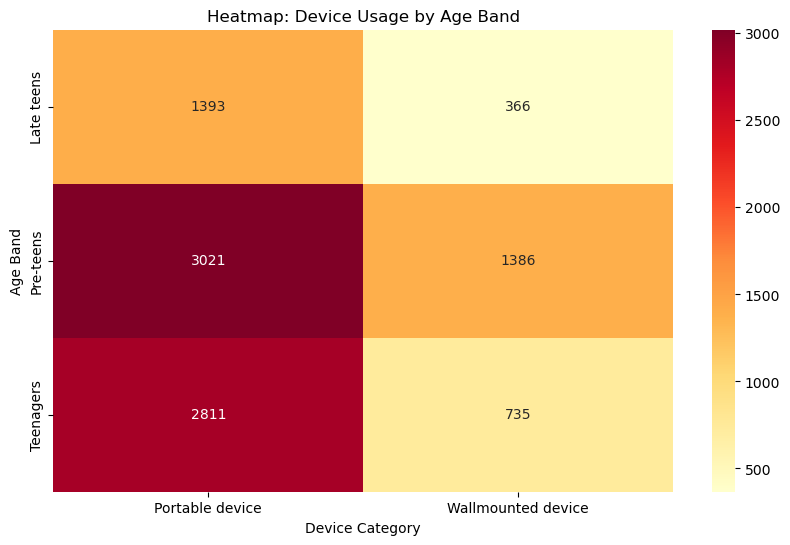

In [8]:
# Heatmap – Device Category vs Age Band (Usage Counts)
device_age_heat = pd.crosstab(df['Age_Band'], df['Device_Category'])

plt.figure(figsize=(10,6))
sns.heatmap(device_age_heat, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap: Device Usage by Age Band')
plt.xlabel('Device Category')
plt.ylabel('Age Band')
plt.show()

In [ ]:
# Insights:
1. Portable devices dominate across all age bands.
2. Younger kids have relatively higher wallmounted usage.

In [ ]:
# Final Observations : 
1. Portable devices dominate across all demographics, especially urban teens.
2. Recreational usage increases sharply with age, particularly among teenage boys.
3. Urban kids use devices more for recreation, while rural kids show a more balanced mix.
4. Gender differences exist but are less pronounced compared to age and location differences.
5. Key peak usage cohort: Urban teenage boys on portable devices with high recreational activity.